In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Replace 'data.xlsx' with the actual path to your data file
data = pd.read_csv('C:/Users/DELL/GRAI.csv')


In [3]:
# Handle missing values (e.g., fill with mean/median or drop rows)
data.fillna(data.mean(), inplace=True)

# Convert categorical features to numerical (e.g., using one-hot encoding)
categorical_features = ['Ministries_Departments']
data = pd.get_dummies(data, columns=categorical_features)

# Feature engineering (e.g., create new features)
# ... (your feature engineering code here)

# Define target variable (e.g., column indicating misrouting)
target_variable = 'Timeline'

# Separate features and target variables
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5936\3717066983.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [4]:
# Choose a model (e.g., linear regression)
from sklearn.linear_model import LinearRegression

# Create a model instance
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Use the trained model to predict on new data
y_pred = model.predict(X_test)


In [6]:
# Use appropriate metrics for regression, such as:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 182.40268137694875
R-squared: 0.2023451309014519


In [7]:
# Example using feature importances for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print feature names and importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


Registration: 0.0123
Appeals_Redressed: 0.0067
Corruption: 0.0603
Average_Disposal_Time: 0.7629
Pendency: 0.0039
Appeal_filed: 0.0218
Excellent_remarks: 0.0124
Complaint_labelled: 0.0264
Adequacy: 0.0095
Ratio_GROs: 0.0435
Active_GROs: 0.0189
Ministries_Departments_Central Board of Direct Taxes (Income Tax): 0.0046
Ministries_Departments_Central Board of Indirect Taxes and Customs: 0.0001
Ministries_Departments_Department of Agriculture and Farmers Welfare: 0.0052
Ministries_Departments_Department of Consumer Affairs: 0.0002
Ministries_Departments_Department of Defence: 0.0000
Ministries_Departments_Department of Defence Finance: 0.0000
Ministries_Departments_Department of Ex Servicemen Welfare: 0.0000
Ministries_Departments_Department of Financial Services : 0.0019
Ministries_Departments_Department of Financial Services (Insurance Division): 0.0000
Ministries_Departments_Department of Health & Family Welfare: 0.0000
Ministries_Departments_Department of Higher Education: 0.0001
Ministr

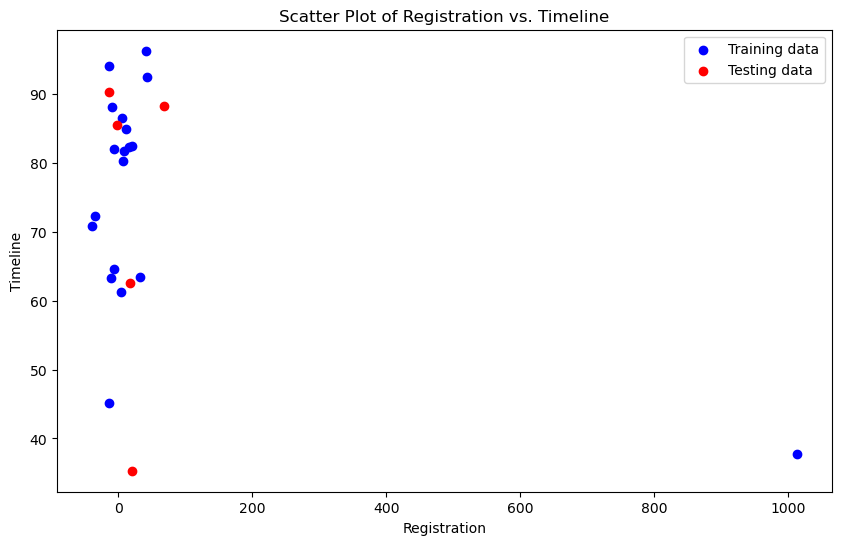

In [11]:
import matplotlib.pyplot as plt

# Choose the feature you want to visualize
feature = 'Registration'

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train[feature], y_train, color='blue', label='Training data')
plt.scatter(X_test[feature], y_test, color='red', label='Testing data')
plt.title('Scatter Plot of {} vs. Timeline'.format(feature))
plt.xlabel(feature)
plt.ylabel('Timeline')
plt.legend()
plt.show()


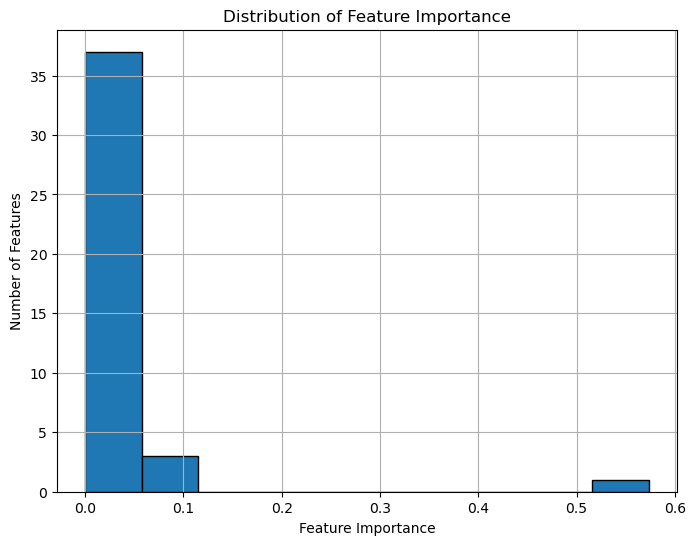

In [8]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Create sample data
X = X_train
y = y_train

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Feature names
feature_names = ["Timeline", "Registration", "Appeals_Redressed", "Corruption", "Average_Disposal_Time", "Pendency", "Appeal_filed", "Excellent_remarks", "Complaint_labelled", "Ratio_GROs", "Active_GROs"]

# Create a histogram for feature importance
plt.figure(figsize=(8, 6))
plt.hist(importances, bins=10, edgecolor="black")
plt.xlabel("Feature Importance")
plt.ylabel("Number of Features")
plt.title("Distribution of Feature Importance")
plt.grid(True)
plt.show()

In [14]:
!pip install pdpbox

In [15]:
from pdpbox import pdp, get_dataset

# Create transformers for PDP calculation
pdp_transformers = pdp.from_estimator(model, X_train)

# Choose a feature to visualize
feature_to_plot = X.columns[1]  # Replace with the desired feature

# Calculate partial dependence
pdp_results = pdp.compute_partial_dependence(pdp_transformers, X_train, feature_to_plot, ice=True)

# Plot the partial dependence
pdp.plot_partial_dependence(pdp_results, feature_to_plot)


ImportError: cannot import name 'get_dataset' from 'pdpbox' (C:\Users\DELL\anaconda3\Lib\site-packages\pdpbox\__init__.py)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("C:/Users/DELL/GRAI.csv")

# Numerical columns to be used
numerical_columns = ["Timeline", "Registration", "Appeals_Redressed", "Corruption", "Average_Disposal_Time", "Pendency", "Appeal_filed", "Excellent_remarks", "Complaint_labelled", "Ratio_GROs", "Active_GROs"]

# Feature engineering (aggregation)
# Calculate the mean of all numerical columns
data["mean_features"] = data[numerical_columns].mean(axis=1)

# Alternatively, perform other aggregations or feature engineering here

# Define target variable
target_variable = "Timeline"

# Separate features and target variable
X = data[["mean_features"]]  # Use only the aggregated feature
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., using mean squared error)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 662.4593756435577
